In [1]:

import ipywidgets
from matplotlib import pyplot as plt
from termcolor import colored
import xarray as xr
import numpy as np
import matplotlib.gridspec as gridspec
from glob import iglob
from os.path import join
from functools import reduce
import pandas as pd
#import harp
import itertools
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np

In [2]:
product_path = "DublinNO22019/"
#print(product_path)

#2020 data stored in a list
files2019 =sorted(list(iglob(join("DublinNO22019/*"), recursive =True)))
#print(files2019)
print(colored("NO2 2019 files:","red"), len(files2019))



#import glob
#print(glob.glob("C:/Users/dk/Downloads/Dublin Analysis/DublinNO22019/*"))
#sample file for testing on a 1stMARCH2019 data
file1 = "/home/tejasri/Desktop/Intern_work/LockdownAnalysis_Ireland/DublinNO22019/S5P_OFFL_L2__NO2____20190420T125336_20190420T143506_07862_01_010300_20190426T150216.SUB.nc4"
print(colored("Product selected for analyis:","blue"), file1)


NO2 2019 files: 102
Product selected for analyis: /home/tejasri/Desktop/Intern_work/LockdownAnalysis_Ireland/DublinNO22019/S5P_OFFL_L2__NO2____20190420T125336_20190420T143506_07862_01_010300_20190426T150216.SUB.nc4


In [3]:
#opening product ----Global Attributes
with xr.open_dataset(file1) as file1GA:
    print(colored("Global attributes:\n", "blue"), file1GA)


#opeining product METADATA
with xr.open_dataset(file1, group = "METADATA") as file1MT:
    print(colored("\nMETADATA:\n", "blue"), file1MT)
    
with xr.open_dataset(file1, group ="PRODUCT") as file1PRD:
    print(colored("\nPRODUCT GROUP:\n", "blue"), file1PRD)

Global attributes:
 <xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/53)
    Conventions:                        CF-1.7
    institution:                        KNMI
    source:                             Sentinel 5 precursor, TROPOMI, space-...
    summary:                            TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id:                        78dd758c-8f8d-48bb-a020-7521cd492ac3
    id:                                 S5P_OFFL_L2__NO2____20190420T125336_2...
    ...                                 ...
    Status_MET_2D:                      Nominal
    Status_NISE__:                      Nominal
    Status_CTMFCT:                      Nominal
    processing_status:                  OFFL-processing nominal product
    date_modified:                      2019-05-02T13:11:35Z
    history:                            2019-04-26 15:11:42 f_s5pops tropnll2...

METADATA:
 <xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

PRODUCT GRO

In [4]:
#DATA VARIABLES ACCESS
no = file1PRD['nitrogendioxide_tropospheric_column']
print(colored("\nAttributes:", "blue"), no.attrs)
print(colored("\nValues:", "blue"), no.values)
print(colored('Dimension of axis:', "blue"), no.dims)
print(colored("\nCoordinates", "blue"), no.coords)


Attributes: {'units': 'mol m-2', 'standard_name': 'troposphere_mole_content_of_nitrogen_dioxide', 'long_name': 'Tropospheric vertical column of nitrogen dioxide', 'ancillary_variables': 'nitrogendioxide_tropospheric_column_precision air_mass_factor_troposphere air_mass_factor_total averaging_kernel', 'multiplication_factor_to_convert_to_molecules_percm2': 6.02214e+19}

Values: [[[1.10119174e-04 1.01697100e-04 8.44165334e-05]
  [1.65526682e-04 1.70772459e-04 1.41712604e-04]
  [1.57201008e-04 1.41935248e-04 9.86830710e-05]]]
Dimension of axis: ('time', 'scanline', 'ground_pixel')

Coordinates Coordinates:
    longitude     (time, scanline, ground_pixel) float32 ...
    latitude      (time, scanline, ground_pixel) float32 ...
  * time          (time) datetime64[ns] 2019-04-20
  * scanline      (scanline) float64 2.205e+03 2.206e+03 2.207e+03
  * ground_pixel  (ground_pixel) float64 389.0 390.0 391.0


In [5]:
lst = []

# with xr.open_dataset(file1, group ="PRODUCT") as file1PRD:
#     print(colored("\nPRODUCT GROUP:\n", "blue"), file1PRD)

In [6]:
import sys

for i in files2019:
    #print(file1)
    file1PRD = xr.open_dataset(i, group ="PRODUCT", engine = 'netcdf4')
    no2 = file1PRD['nitrogendioxide_tropospheric_column']
    no2_new = np.nan_to_num(no2.values)
    sumele = np.sum(no2_new)
    nonzero = np.count_nonzero(no2_new)
    average = sumele/nonzero
    name = i[71:79]
    print(name," ", average)


_01_0102   7.675825618207455e-05
_01_0102   3.560835522456238e-05
_01_0102   4.765507280050466e-05
_01_0102   4.7722870173553623e-05
_01_0102   5.9657118981704116e-05
_01_0102   3.2514395570615307e-06
_01_0102   9.543208094934623e-06
_01_0102   1.771336974343285e-05
_01_0102   1.4076640486325088e-05
_01_0102   2.660108730196953e-05
_01_0102   1.3998328358866275e-05
_01_0102   2.5493664517333464e-05
_01_0102   3.94675531424582e-05
_01_0102   3.0967494240030646e-05
_01_0102   9.27726796362549e-06
_01_0102   8.985066625217978e-06
_01_0102   -8.411092898717874e-08
_01_0102   1.0910596373785092e-05
_01_0102   3.0057526947486968e-05
_01_0102   6.505964443527369e-06
_01_0102   7.804399905985014e-06
_01_0102   3.152535117061978e-05
_01_0102   2.0102701455471106e-05
_01_0102   2.877386335361128e-05
_01_0102   2.1398468211723062e-05
_01_0102   3.659760477603413e-05
_01_0102   3.440759610384703e-05
_01_0102   2.7334935674887328e-05
_01_0102   2.125713600482988e-05
_01_0102   3.076476527244917e-05

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()

df = pd.read_csv("no2_2019.csv")



In [54]:
df.head()

Date     Value
0  20200301  0.000010
1  20200302  0.000021
2  20200303  0.000026
3  20200304  0.000102
4  20200305  0.000048

In [55]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

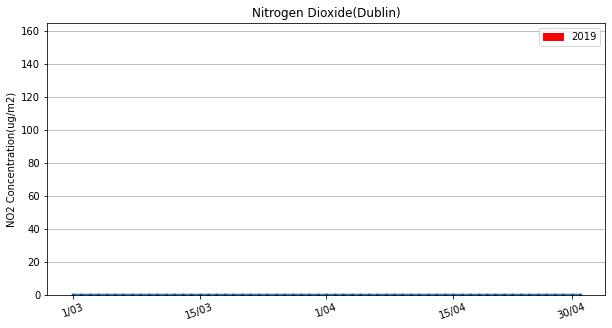

In [64]:
### LINE PLOT
#dfnew = df[['Conc(umol/m2)_2019','Conc(umol/m2)_2020']]
plt.plot(df['Value'],marker='.', markerfacecolor='blue',)
#plt.plot(dfnew['Conc(umol/m2)_2020'],marker='.', color='red',)
#bar_width = 20

df.head()
plt.xticks([0, 15, 30, 45, 59], ['1/03','15/03','1/04', '15/04', '30/04'],rotation=20)
#plt.xticks(x, ["Feb","March","April",])

plt.title('Nitrogen Dioxide(Dublin)')
plt.ylabel('NO2 Concentration(ug/m2)')
plt.grid(axis= 'y')
plt.ylim(0,165)
#blue_patch = mpatches.Patch(color = 'blue', label = '2019')
red_patch = mpatches.Patch(color = 'red', label = '2019')
plt.legend(handles = [red_patch])
plt.rcParams['figure.figsize'] = [10,5]

#fig.tight_layout()
#plt.savefig('NO2_2020.pdf')  
#plt.savefig('NO2_2020.png', dpi=300, transparent=True)

In [65]:
df2 = pd.read_csv("no2_2020.csv")
df2.head()


Date     Value
0  20200301  0.000010
1  20200302  0.000021
2  20200303  0.000026
3  20200304  0.000102
4  20200305  0.000048

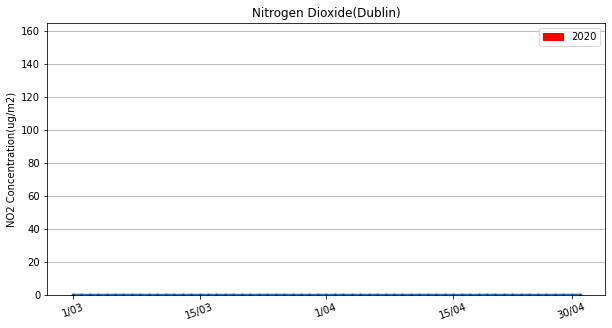

In [66]:
### LINE PLOT
#dfnew = df[['Conc(umol/m2)_2019','Conc(umol/m2)_2020']]
plt.plot(df2['Value'],marker='.', markerfacecolor='blue',)
#plt.plot(dfnew['Conc(umol/m2)_2020'],marker='.', color='red',)
#bar_width = 20

df2.head()
plt.xticks([0, 15, 30, 45, 59], ['1/03','15/03','1/04', '15/04', '30/04'],rotation=20)
#plt.xticks(x, ["Feb","March","April",])

plt.title('Nitrogen Dioxide(Dublin)')
plt.ylabel('NO2 Concentration(ug/m2)')
plt.grid(axis= 'y')
plt.ylim(0,165)
#blue_patch = mpatches.Patch(color = 'blue', label = '2019')
red_patch = mpatches.Patch(color = 'red', label = '2020')
plt.legend(handles = [red_patch])
plt.rcParams['figure.figsize'] = [10,5]

#fig.tight_layout()
#plt.savefig('NO2_2020.pdf')  
#plt.savefig('NO2_2020.png', dpi=300, transparent=True)

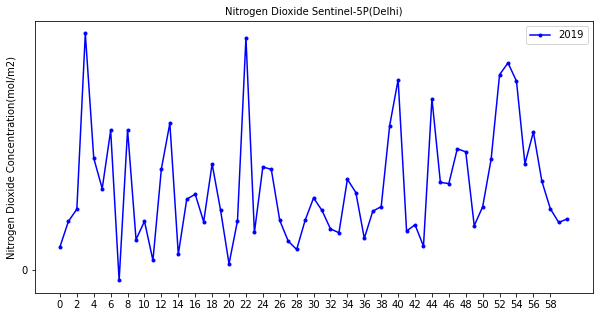

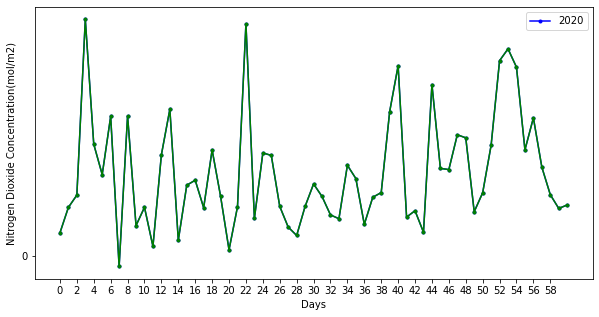

In [67]:

import pandas as pd
from matplotlib import pyplot as plt

#plt.style.use('seaborn')
fig1, ax1 = plt.subplots()
plt.xticks(numpy.arange(0, 60, 2)) 
plt.yticks(numpy.arange(0, 160, 10))


fig2, ax2 = plt.subplots()
ax2.set_xlabel('Days')
plt.xticks(numpy.arange(0, 60, 2)) 
plt.yticks(numpy.arange(0, 160, 10))
#ax1.plot(days, dfnew1, color='#444444',
#         linestyle='--', label='2019')


ax1.plot(df['Value'],marker='.', color='blue', label='2019')


ax2.plot(df2['Value'],marker='.', color='blue', label='2020')


ax1.legend()
ax1.set_title('Nitrogen Dioxide Sentinel-5P(Delhi)', fontsize=10)
ax1.set_ylabel('Nitrogen Dioxide Concentration(mol/m2)', fontsize=10)


ax2.legend()
#ax2.set_xlabel('Days')
ax2.set_ylabel('Nitrogen Dioxide Concentration(mol/m2)', fontsize=10)
ax2.plot(df2['Value'],marker='.', color='green')

#plt.tight_layout()
plt.rcParams['figure.figsize'] = [5,3]

plt.show()
#fig1.savefig('fig1.png', dpi = 300, transparent = True)
#fig2.savefig('fig2.png', dpi = 300, transparent = True)

#fig1.savefig('fig1.pdf', dpi = 300, transparent = True)
#fig2.savefig('fig2.pdf', dpi = 300, transparent = True)

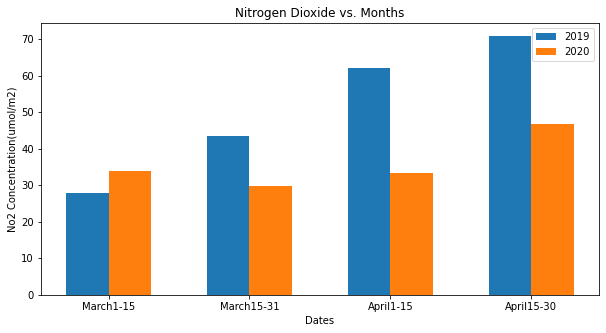

<Figure size 360x216 with 0 Axes>

In [68]:
# Numbers of pairs of bars you want
N = 4

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (27.97294443, 43.38023352, 62.08171413, 70.87179729)
# Specify the values of orange bars (height)
orange_bar = (33.95626673, 29.85439074, 33.30591823, 46.64550779)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='2019')
plt.bar(ind + width, orange_bar, width, label='2020')

plt.xlabel('Dates')
plt.ylabel('No2 Concentration(umol/m2)')
plt.title('Nitrogen Dioxide vs. Months')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('March1-15', 'March15-31', 'April1-15','April15-30'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()
plt.savefig('no2_barplot.png', dpi = 300, transparent = True)
